In [1]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import tensorflow as tf
from keras import Input, Model
from keras.models import Sequential, Model, load_model


import random

import sys
sys.path.append("..")

import dataset,network

# Load Data

In [2]:
# Preprocessing

scenario= "moons" #sinus, helix
#n_instance = 1000
n_instance = 1000
n_features = 2
Z = 6 #3的倍數
nodes = 4 #8
var = 4
scales = ['-1-1','0-1']
scaled = '-1-1'

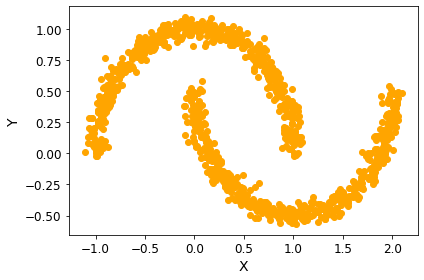

In [3]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [4]:
#storage data
os.system('mkdir Dataset')
os.system('mkdir AAE')
os.system('mkdir AAE/Models')
os.system('mkdir AAE/Losses')
os.system('mkdir AAE/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')
print('made dataset')

(1000, 1) (1000, 1)
made dataset


# AAE

### Architecture

In [5]:
encoder=network.build_encoder(Z, nodes, n_features)
decoder=network.build_decoder(Z, var, n_features)
discriminator=network.build_discriminator(Z, nodes)
discriminator.summary()

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           128         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64)           256         dense[0][0]                      
__________________________________________________________________________________________________
re_lu (ReLU)                    (None, 64)           0           batch_normalization[0][0]        
____________________________________________________________________________________________

### Preprocessing

In [6]:
import AAE_Model

GANorWGAN='GAN' #GAN
epochs = 40000 #500
batch_size = 100

In [7]:
aae = AAE_Model.AAE(Z, n_features, batch_size, GANorWGAN, nodes, var)

Model: "Encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 64)           128         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 64)           256         dense_11[0][0]                   
__________________________________________________________________________________________________
re_lu_9 (ReLU)                  (None, 64)           0           batch_normalization_14[0][0]     
____________________________________________________________________________________________

In [8]:
train_dataset, scaler, X_train_scaled = aae.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)


data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (100, 2)
Cycles:  10
X_train (1000, 1)
y_train (1000, 1)
X_train_scaled (1000, 2)


### latent variable

## Training

In [9]:
hist = aae.train(Z, batch_size, train_dataset, epochs, scaler, X_train_scaled, scaled, X_train, y_train )


1 [D real: -0.575005, D fake: 0.600366], [Enc/Dec loss: 0.761286, Enc/Dis: 0.767831]
2 [D real: -0.584065, D fake: 0.609396], [Enc/Dec loss: 0.752300, Enc/Dis: 0.758898]
3 [D real: -0.591618, D fake: 0.612037], [Enc/Dec loss: 0.736190, Enc/Dis: 0.742884]
4 [D real: -0.597697, D fake: 0.616697], [Enc/Dec loss: 0.746799, Enc/Dis: 0.753542]
5 [D real: -0.600390, D fake: 0.619056], [Enc/Dec loss: 0.718659, Enc/Dis: 0.725417]
6 [D real: -0.605623, D fake: 0.622232], [Enc/Dec loss: 0.719018, Enc/Dis: 0.725832]
7 [D real: -0.610215, D fake: 0.626688], [Enc/Dec loss: 0.698412, Enc/Dis: 0.705241]
8 [D real: -0.616353, D fake: 0.631070], [Enc/Dec loss: 0.684406, Enc/Dis: 0.691290]
9 [D real: -0.623057, D fake: 0.636213], [Enc/Dec loss: 0.677675, Enc/Dis: 0.684614]
10 [D real: -0.628577, D fake: 0.639525], [Enc/Dec loss: 0.662406, Enc/Dis: 0.669378]
11 [D real: -0.676947, D fake: 0.689628], [Enc/Dec loss: 0.549461, Enc/Dis: 0.556737]
12 [D real: -0.682807, D fake: 0.693202], [Enc/Dec loss: 0.5399

94 [D real: -0.978176, D fake: 0.978482], [Enc/Dec loss: 0.142524, Enc/Dis: 0.152483]
95 [D real: -0.978290, D fake: 0.978756], [Enc/Dec loss: 0.139390, Enc/Dis: 0.149348]
96 [D real: -0.978623, D fake: 0.979250], [Enc/Dec loss: 0.139616, Enc/Dis: 0.149579]
97 [D real: -0.979017, D fake: 0.979584], [Enc/Dec loss: 0.135246, Enc/Dis: 0.145207]
98 [D real: -0.979377, D fake: 0.980027], [Enc/Dec loss: 0.139206, Enc/Dis: 0.149173]
99 [D real: -0.979756, D fake: 0.980580], [Enc/Dec loss: 0.139453, Enc/Dis: 0.149423]
100 [D real: -0.980143, D fake: 0.981007], [Enc/Dec loss: 0.136836, Enc/Dis: 0.146807]
101 [D real: -0.983837, D fake: 0.984639], [Enc/Dec loss: 0.110657, Enc/Dis: 0.120641]
102 [D real: -0.983557, D fake: 0.985345], [Enc/Dec loss: 0.127581, Enc/Dis: 0.137585]
103 [D real: -0.983837, D fake: 0.985325], [Enc/Dec loss: 0.120736, Enc/Dis: 0.130733]
104 [D real: -0.984162, D fake: 0.985477], [Enc/Dec loss: 0.120899, Enc/Dis: 0.130899]
105 [D real: -0.984623, D fake: 0.985620], [Enc/D

189 [D real: -0.999160, D fake: 0.999191], [Enc/Dec loss: 0.098168, Enc/Dis: 0.108269]
190 [D real: -0.999165, D fake: 0.999203], [Enc/Dec loss: 0.096483, Enc/Dis: 0.106583]
191 [D real: -0.999379, D fake: 0.999329], [Enc/Dec loss: 0.097317, Enc/Dis: 0.107419]
192 [D real: -0.999343, D fake: 0.999334], [Enc/Dec loss: 0.090724, Enc/Dis: 0.100819]
193 [D real: -0.999360, D fake: 0.999341], [Enc/Dec loss: 0.093579, Enc/Dis: 0.103677]
194 [D real: -0.999376, D fake: 0.999374], [Enc/Dec loss: 0.097496, Enc/Dis: 0.107598]
195 [D real: -0.999384, D fake: 0.999379], [Enc/Dec loss: 0.094818, Enc/Dis: 0.104918]
196 [D real: -0.999397, D fake: 0.999395], [Enc/Dec loss: 0.098704, Enc/Dis: 0.108808]
197 [D real: -0.999404, D fake: 0.999412], [Enc/Dec loss: 0.100734, Enc/Dis: 0.110840]
198 [D real: -0.999423, D fake: 0.999420], [Enc/Dec loss: 0.098455, Enc/Dis: 0.108559]
199 [D real: -0.999422, D fake: 0.999433], [Enc/Dec loss: 0.098548, Enc/Dis: 0.108652]
200 [D real: -0.999432, D fake: 0.999441], 

284 [D real: -0.999971, D fake: 0.999967], [Enc/Dec loss: 0.082462, Enc/Dis: 0.092555]
285 [D real: -0.999972, D fake: 0.999968], [Enc/Dec loss: 0.081143, Enc/Dis: 0.091234]
286 [D real: -0.999972, D fake: 0.999969], [Enc/Dec loss: 0.085225, Enc/Dis: 0.095320]
287 [D real: -0.999972, D fake: 0.999970], [Enc/Dec loss: 0.084892, Enc/Dis: 0.094987]
288 [D real: -0.999973, D fake: 0.999970], [Enc/Dec loss: 0.088877, Enc/Dis: 0.098976]
289 [D real: -0.999973, D fake: 0.999971], [Enc/Dec loss: 0.087952, Enc/Dis: 0.098050]
290 [D real: -0.999973, D fake: 0.999972], [Enc/Dec loss: 0.086571, Enc/Dis: 0.096668]
291 [D real: -0.999974, D fake: 0.999979], [Enc/Dec loss: 0.090279, Enc/Dis: 0.100379]
292 [D real: -0.999976, D fake: 0.999978], [Enc/Dec loss: 0.095822, Enc/Dis: 0.105928]
293 [D real: -0.999976, D fake: 0.999978], [Enc/Dec loss: 0.098801, Enc/Dis: 0.108910]
294 [D real: -0.999977, D fake: 0.999978], [Enc/Dec loss: 0.097144, Enc/Dis: 0.107251]
295 [D real: -0.999977, D fake: 0.999978], 

379 [D real: -0.999991, D fake: 0.999980], [Enc/Dec loss: 0.080487, Enc/Dis: 0.090577]
380 [D real: -0.999991, D fake: 0.999980], [Enc/Dec loss: 0.082550, Enc/Dis: 0.092643]
381 [D real: -0.999990, D fake: 0.999982], [Enc/Dec loss: 0.080439, Enc/Dis: 0.090529]
382 [D real: -0.999992, D fake: 0.999967], [Enc/Dec loss: 0.087811, Enc/Dis: 0.097909]
383 [D real: -0.999990, D fake: 0.999956], [Enc/Dec loss: 0.083799, Enc/Dis: 0.093893]
384 [D real: -0.999990, D fake: 0.999960], [Enc/Dec loss: 0.082062, Enc/Dis: 0.092154]
385 [D real: -0.999989, D fake: 0.999963], [Enc/Dec loss: 0.084377, Enc/Dis: 0.094471]
386 [D real: -0.999989, D fake: 0.999963], [Enc/Dec loss: 0.090874, Enc/Dis: 0.100974]
387 [D real: -0.999990, D fake: 0.999964], [Enc/Dec loss: 0.087438, Enc/Dis: 0.097535]
388 [D real: -0.999990, D fake: 0.999965], [Enc/Dec loss: 0.088155, Enc/Dis: 0.098252]
389 [D real: -0.999990, D fake: 0.999965], [Enc/Dec loss: 0.089301, Enc/Dis: 0.099400]
390 [D real: -0.999990, D fake: 0.999967], 

474 [D real: -0.999929, D fake: 0.999522], [Enc/Dec loss: 0.077981, Enc/Dis: 0.088066]
475 [D real: -0.999921, D fake: 0.999549], [Enc/Dec loss: 0.079088, Enc/Dis: 0.089173]
476 [D real: -0.999931, D fake: 0.999595], [Enc/Dec loss: 0.079668, Enc/Dis: 0.089754]
477 [D real: -0.999935, D fake: 0.999568], [Enc/Dec loss: 0.082894, Enc/Dis: 0.092983]
478 [D real: -0.999936, D fake: 0.999597], [Enc/Dec loss: 0.081944, Enc/Dis: 0.092032]
479 [D real: -0.999938, D fake: 0.999590], [Enc/Dec loss: 0.084103, Enc/Dis: 0.094193]
480 [D real: -0.999940, D fake: 0.999598], [Enc/Dec loss: 0.082862, Enc/Dis: 0.092952]
481 [D real: -0.999921, D fake: 0.999722], [Enc/Dec loss: 0.071188, Enc/Dis: 0.081263]
482 [D real: -0.999950, D fake: 0.999731], [Enc/Dec loss: 0.070229, Enc/Dis: 0.080304]
483 [D real: -0.999957, D fake: 0.999620], [Enc/Dec loss: 0.071258, Enc/Dis: 0.081334]
484 [D real: -0.999947, D fake: 0.999601], [Enc/Dec loss: 0.077339, Enc/Dis: 0.087421]
485 [D real: -0.999938, D fake: 0.999564], 

569 [D real: -0.999739, D fake: 0.998030], [Enc/Dec loss: 0.080368, Enc/Dis: 0.090436]
570 [D real: -0.999722, D fake: 0.998043], [Enc/Dec loss: 0.082104, Enc/Dis: 0.092173]
571 [D real: -0.999713, D fake: 0.999505], [Enc/Dec loss: 0.073287, Enc/Dis: 0.083355]
572 [D real: -0.999554, D fake: 0.999195], [Enc/Dec loss: 0.074334, Enc/Dis: 0.084397]
573 [D real: -0.999680, D fake: 0.999002], [Enc/Dec loss: 0.076367, Enc/Dis: 0.086434]
574 [D real: -0.999720, D fake: 0.998810], [Enc/Dec loss: 0.073702, Enc/Dis: 0.083768]
575 [D real: -0.999764, D fake: 0.998849], [Enc/Dec loss: 0.079576, Enc/Dis: 0.089648]
576 [D real: -0.999791, D fake: 0.998777], [Enc/Dec loss: 0.078708, Enc/Dis: 0.088776]
577 [D real: -0.999762, D fake: 0.998499], [Enc/Dec loss: 0.077725, Enc/Dis: 0.087789]
578 [D real: -0.999735, D fake: 0.998576], [Enc/Dec loss: 0.076904, Enc/Dis: 0.086968]
579 [D real: -0.999756, D fake: 0.998635], [Enc/Dec loss: 0.075910, Enc/Dis: 0.085974]
580 [D real: -0.999701, D fake: 0.998742], 

664 [D real: -0.999707, D fake: 0.997225], [Enc/Dec loss: 0.083135, Enc/Dis: 0.093189]
665 [D real: -0.999726, D fake: 0.996621], [Enc/Dec loss: 0.080468, Enc/Dis: 0.090525]
666 [D real: -0.999751, D fake: 0.995513], [Enc/Dec loss: 0.081210, Enc/Dis: 0.091268]
667 [D real: -0.999666, D fake: 0.995467], [Enc/Dec loss: 0.084016, Enc/Dis: 0.094075]
668 [D real: -0.999682, D fake: 0.995230], [Enc/Dec loss: 0.083240, Enc/Dis: 0.093298]
669 [D real: -0.999703, D fake: 0.995215], [Enc/Dec loss: 0.082734, Enc/Dis: 0.092790]
670 [D real: -0.999609, D fake: 0.994620], [Enc/Dec loss: 0.083634, Enc/Dis: 0.093687]
671 [D real: -0.999655, D fake: 0.995675], [Enc/Dec loss: 0.080984, Enc/Dis: 0.091019]
672 [D real: -0.999696, D fake: 0.996933], [Enc/Dec loss: 0.082179, Enc/Dis: 0.092212]
673 [D real: -0.999775, D fake: 0.997552], [Enc/Dec loss: 0.082806, Enc/Dis: 0.092836]
674 [D real: -0.999767, D fake: 0.997937], [Enc/Dec loss: 0.077214, Enc/Dis: 0.087246]
675 [D real: -0.999779, D fake: 0.997990], 

759 [D real: -0.999583, D fake: 0.995407], [Enc/Dec loss: 0.073419, Enc/Dis: 0.083444]
760 [D real: -0.999604, D fake: 0.995519], [Enc/Dec loss: 0.073202, Enc/Dis: 0.083229]
761 [D real: -0.999710, D fake: 0.995903], [Enc/Dec loss: 0.061039, Enc/Dis: 0.071039]
762 [D real: -0.999639, D fake: 0.995652], [Enc/Dec loss: 0.070762, Enc/Dis: 0.080774]
763 [D real: -0.999443, D fake: 0.995780], [Enc/Dec loss: 0.069901, Enc/Dis: 0.079905]
764 [D real: -0.999490, D fake: 0.994497], [Enc/Dec loss: 0.072831, Enc/Dis: 0.082835]
765 [D real: -0.998745, D fake: 0.994455], [Enc/Dec loss: 0.074864, Enc/Dis: 0.084878]
766 [D real: -0.998807, D fake: 0.995195], [Enc/Dec loss: 0.075476, Enc/Dis: 0.085490]
767 [D real: -0.998946, D fake: 0.994916], [Enc/Dec loss: 0.072927, Enc/Dis: 0.082939]
768 [D real: -0.998958, D fake: 0.994847], [Enc/Dec loss: 0.073144, Enc/Dis: 0.083157]
769 [D real: -0.998786, D fake: 0.994877], [Enc/Dec loss: 0.072886, Enc/Dis: 0.082904]
770 [D real: -0.998890, D fake: 0.994755], 

854 [D real: -0.998226, D fake: 0.991245], [Enc/Dec loss: 0.068537, Enc/Dis: 0.078486]
855 [D real: -0.998498, D fake: 0.990974], [Enc/Dec loss: 0.071604, Enc/Dis: 0.081562]
856 [D real: -0.998617, D fake: 0.991791], [Enc/Dec loss: 0.075605, Enc/Dis: 0.085572]
857 [D real: -0.998789, D fake: 0.991319], [Enc/Dec loss: 0.075518, Enc/Dis: 0.085491]
858 [D real: -0.998727, D fake: 0.991040], [Enc/Dec loss: 0.075208, Enc/Dis: 0.085178]
859 [D real: -0.998794, D fake: 0.990819], [Enc/Dec loss: 0.074023, Enc/Dis: 0.084001]
860 [D real: -0.998777, D fake: 0.991207], [Enc/Dec loss: 0.073578, Enc/Dis: 0.083548]
861 [D real: -0.999868, D fake: 0.989401], [Enc/Dec loss: 0.092792, Enc/Dis: 0.102718]
862 [D real: -0.999097, D fake: 0.992419], [Enc/Dec loss: 0.072404, Enc/Dis: 0.082340]
863 [D real: -0.999055, D fake: 0.989264], [Enc/Dec loss: 0.075754, Enc/Dis: 0.085712]
864 [D real: -0.998623, D fake: 0.990779], [Enc/Dec loss: 0.073787, Enc/Dis: 0.083752]
865 [D real: -0.998751, D fake: 0.990789], 

949 [D real: -0.998125, D fake: 0.983627], [Enc/Dec loss: 0.074762, Enc/Dis: 0.084668]
950 [D real: -0.997873, D fake: 0.983427], [Enc/Dec loss: 0.076706, Enc/Dis: 0.086613]
951 [D real: -0.998994, D fake: 0.990673], [Enc/Dec loss: 0.088451, Enc/Dis: 0.098434]
952 [D real: -0.998992, D fake: 0.986088], [Enc/Dec loss: 0.087591, Enc/Dis: 0.097578]
953 [D real: -0.999036, D fake: 0.983818], [Enc/Dec loss: 0.083062, Enc/Dis: 0.093035]
954 [D real: -0.999053, D fake: 0.981868], [Enc/Dec loss: 0.080029, Enc/Dis: 0.089950]
955 [D real: -0.999088, D fake: 0.982781], [Enc/Dec loss: 0.077721, Enc/Dis: 0.087607]
956 [D real: -0.999004, D fake: 0.983836], [Enc/Dec loss: 0.076143, Enc/Dis: 0.086034]
957 [D real: -0.999022, D fake: 0.984348], [Enc/Dec loss: 0.078893, Enc/Dis: 0.088783]
958 [D real: -0.998898, D fake: 0.985406], [Enc/Dec loss: 0.079205, Enc/Dis: 0.089094]
959 [D real: -0.998619, D fake: 0.985320], [Enc/Dec loss: 0.077208, Enc/Dis: 0.087095]
960 [D real: -0.998480, D fake: 0.984760], 

1043 [D real: -0.998161, D fake: 0.984552], [Enc/Dec loss: 0.072189, Enc/Dis: 0.082089]
1044 [D real: -0.998322, D fake: 0.984315], [Enc/Dec loss: 0.076952, Enc/Dis: 0.086826]
1045 [D real: -0.997934, D fake: 0.983648], [Enc/Dec loss: 0.073207, Enc/Dis: 0.083079]
1046 [D real: -0.997791, D fake: 0.983466], [Enc/Dec loss: 0.073156, Enc/Dis: 0.083023]
1047 [D real: -0.997812, D fake: 0.983840], [Enc/Dec loss: 0.073008, Enc/Dis: 0.082881]
1048 [D real: -0.998042, D fake: 0.981217], [Enc/Dec loss: 0.071701, Enc/Dis: 0.081561]
1049 [D real: -0.998067, D fake: 0.981199], [Enc/Dec loss: 0.072636, Enc/Dis: 0.082490]
1050 [D real: -0.997692, D fake: 0.980611], [Enc/Dec loss: 0.072915, Enc/Dis: 0.082756]
1051 [D real: -0.998596, D fake: 0.963074], [Enc/Dec loss: 0.067057, Enc/Dis: 0.076839]
1052 [D real: -0.997448, D fake: 0.974825], [Enc/Dec loss: 0.079328, Enc/Dis: 0.089161]
1053 [D real: -0.997745, D fake: 0.973814], [Enc/Dec loss: 0.087516, Enc/Dis: 0.097394]
1054 [D real: -0.996867, D fake:

1137 [D real: -0.997075, D fake: 0.969875], [Enc/Dec loss: 0.076904, Enc/Dis: 0.086655]
1138 [D real: -0.996413, D fake: 0.968747], [Enc/Dec loss: 0.080042, Enc/Dis: 0.089820]
1139 [D real: -0.996307, D fake: 0.969517], [Enc/Dec loss: 0.080605, Enc/Dis: 0.090386]
1140 [D real: -0.996630, D fake: 0.968685], [Enc/Dec loss: 0.079972, Enc/Dis: 0.089757]
1141 [D real: -0.996772, D fake: 0.969955], [Enc/Dec loss: 0.068029, Enc/Dis: 0.077818]
1142 [D real: -0.993698, D fake: 0.962921], [Enc/Dec loss: 0.064861, Enc/Dis: 0.074630]
1143 [D real: -0.995089, D fake: 0.962733], [Enc/Dec loss: 0.067402, Enc/Dis: 0.077124]
1144 [D real: -0.993543, D fake: 0.955615], [Enc/Dec loss: 0.070962, Enc/Dis: 0.080674]
1145 [D real: -0.993453, D fake: 0.961797], [Enc/Dec loss: 0.066270, Enc/Dis: 0.075998]
1146 [D real: -0.994487, D fake: 0.964142], [Enc/Dec loss: 0.065816, Enc/Dis: 0.075547]
1147 [D real: -0.994918, D fake: 0.964401], [Enc/Dec loss: 0.067596, Enc/Dis: 0.077321]
1148 [D real: -0.994998, D fake:

1231 [D real: -0.995610, D fake: 0.945842], [Enc/Dec loss: 0.074981, Enc/Dis: 0.084617]
1232 [D real: -0.995989, D fake: 0.956160], [Enc/Dec loss: 0.078317, Enc/Dis: 0.088037]
1233 [D real: -0.995543, D fake: 0.955888], [Enc/Dec loss: 0.066961, Enc/Dis: 0.076602]
1234 [D real: -0.995488, D fake: 0.957439], [Enc/Dec loss: 0.068896, Enc/Dis: 0.078526]
1235 [D real: -0.995588, D fake: 0.954857], [Enc/Dec loss: 0.069077, Enc/Dis: 0.078681]
1236 [D real: -0.992691, D fake: 0.955820], [Enc/Dec loss: 0.070014, Enc/Dis: 0.079603]
1237 [D real: -0.993484, D fake: 0.956138], [Enc/Dec loss: 0.070936, Enc/Dis: 0.080533]
1238 [D real: -0.993821, D fake: 0.955986], [Enc/Dec loss: 0.069491, Enc/Dis: 0.079098]
1239 [D real: -0.993970, D fake: 0.956899], [Enc/Dec loss: 0.073265, Enc/Dis: 0.082886]
1240 [D real: -0.994314, D fake: 0.958086], [Enc/Dec loss: 0.075122, Enc/Dis: 0.084730]
1241 [D real: -0.993145, D fake: 0.966919], [Enc/Dec loss: 0.078395, Enc/Dis: 0.088305]
1242 [D real: -0.994583, D fake:

1325 [D real: -0.997838, D fake: 0.952617], [Enc/Dec loss: 0.072674, Enc/Dis: 0.082193]
1326 [D real: -0.997302, D fake: 0.949992], [Enc/Dec loss: 0.074235, Enc/Dis: 0.083744]
1327 [D real: -0.997213, D fake: 0.947165], [Enc/Dec loss: 0.074979, Enc/Dis: 0.084464]
1328 [D real: -0.997174, D fake: 0.943379], [Enc/Dec loss: 0.073279, Enc/Dis: 0.082741]
1329 [D real: -0.996354, D fake: 0.940238], [Enc/Dec loss: 0.072332, Enc/Dis: 0.081770]
1330 [D real: -0.995971, D fake: 0.941455], [Enc/Dec loss: 0.072288, Enc/Dis: 0.081714]
1331 [D real: -0.997945, D fake: 0.944121], [Enc/Dec loss: 0.075368, Enc/Dis: 0.084714]
1332 [D real: -0.995507, D fake: 0.953453], [Enc/Dec loss: 0.073698, Enc/Dis: 0.083240]
1333 [D real: -0.995365, D fake: 0.949182], [Enc/Dec loss: 0.077672, Enc/Dis: 0.087100]
1334 [D real: -0.995498, D fake: 0.942573], [Enc/Dec loss: 0.075845, Enc/Dis: 0.085283]
1335 [D real: -0.995290, D fake: 0.946473], [Enc/Dec loss: 0.077094, Enc/Dis: 0.086519]
1336 [D real: -0.995088, D fake:

1419 [D real: -0.995468, D fake: 0.920123], [Enc/Dec loss: 0.067761, Enc/Dis: 0.076868]
1420 [D real: -0.995434, D fake: 0.918977], [Enc/Dec loss: 0.068528, Enc/Dis: 0.077669]
1421 [D real: -0.998788, D fake: 0.916887], [Enc/Dec loss: 0.070624, Enc/Dis: 0.079291]
1422 [D real: -0.997108, D fake: 0.916986], [Enc/Dec loss: 0.067310, Enc/Dis: 0.076273]
1423 [D real: -0.992902, D fake: 0.921290], [Enc/Dec loss: 0.072027, Enc/Dis: 0.081025]
1424 [D real: -0.993042, D fake: 0.923959], [Enc/Dec loss: 0.075648, Enc/Dis: 0.084706]
1425 [D real: -0.992135, D fake: 0.928671], [Enc/Dec loss: 0.073736, Enc/Dis: 0.082808]
1426 [D real: -0.992585, D fake: 0.924469], [Enc/Dec loss: 0.073047, Enc/Dis: 0.082154]
1427 [D real: -0.991953, D fake: 0.923086], [Enc/Dec loss: 0.073476, Enc/Dis: 0.082591]
1428 [D real: -0.992289, D fake: 0.918846], [Enc/Dec loss: 0.070728, Enc/Dis: 0.079821]
1429 [D real: -0.992617, D fake: 0.920715], [Enc/Dec loss: 0.070806, Enc/Dis: 0.079921]
1430 [D real: -0.992542, D fake:

1513 [D real: -0.980776, D fake: 0.858851], [Enc/Dec loss: 0.068404, Enc/Dis: 0.077002]
1514 [D real: -0.979786, D fake: 0.857530], [Enc/Dec loss: 0.069050, Enc/Dis: 0.077689]
1515 [D real: -0.982763, D fake: 0.864878], [Enc/Dec loss: 0.067779, Enc/Dis: 0.076412]
1516 [D real: -0.985072, D fake: 0.863482], [Enc/Dec loss: 0.066090, Enc/Dis: 0.074738]
1517 [D real: -0.985213, D fake: 0.865679], [Enc/Dec loss: 0.067298, Enc/Dis: 0.075926]
1518 [D real: -0.986588, D fake: 0.866255], [Enc/Dec loss: 0.069066, Enc/Dis: 0.077679]
1519 [D real: -0.987300, D fake: 0.872964], [Enc/Dec loss: 0.070468, Enc/Dis: 0.079125]
1520 [D real: -0.987947, D fake: 0.873133], [Enc/Dec loss: 0.071304, Enc/Dis: 0.079990]
1521 [D real: -0.994231, D fake: 0.851509], [Enc/Dec loss: 0.073704, Enc/Dis: 0.082221]
1522 [D real: -0.996173, D fake: 0.884176], [Enc/Dec loss: 0.076204, Enc/Dis: 0.084707]
1523 [D real: -0.997023, D fake: 0.893706], [Enc/Dec loss: 0.072863, Enc/Dis: 0.081432]
1524 [D real: -0.997134, D fake:

1607 [D real: -0.992748, D fake: 0.866769], [Enc/Dec loss: 0.076046, Enc/Dis: 0.084541]
1608 [D real: -0.992859, D fake: 0.859989], [Enc/Dec loss: 0.078831, Enc/Dis: 0.087288]
1609 [D real: -0.992914, D fake: 0.853754], [Enc/Dec loss: 0.076847, Enc/Dis: 0.085294]
1610 [D real: -0.992697, D fake: 0.856055], [Enc/Dec loss: 0.074866, Enc/Dis: 0.083338]
1611 [D real: -0.989885, D fake: 0.868932], [Enc/Dec loss: 0.069055, Enc/Dis: 0.077365]
1612 [D real: -0.989738, D fake: 0.856013], [Enc/Dec loss: 0.064026, Enc/Dis: 0.072481]
1613 [D real: -0.990614, D fake: 0.865440], [Enc/Dec loss: 0.069143, Enc/Dis: 0.077628]
1614 [D real: -0.991725, D fake: 0.850604], [Enc/Dec loss: 0.068124, Enc/Dis: 0.076505]
1615 [D real: -0.992194, D fake: 0.860200], [Enc/Dec loss: 0.068827, Enc/Dis: 0.077184]
1616 [D real: -0.991776, D fake: 0.864099], [Enc/Dec loss: 0.068535, Enc/Dis: 0.076862]
1617 [D real: -0.991850, D fake: 0.858877], [Enc/Dec loss: 0.070602, Enc/Dis: 0.078973]
1618 [D real: -0.992279, D fake:

1701 [D real: -0.991294, D fake: 0.859232], [Enc/Dec loss: 0.082126, Enc/Dis: 0.090508]
1702 [D real: -0.993487, D fake: 0.829876], [Enc/Dec loss: 0.074415, Enc/Dis: 0.082476]
1703 [D real: -0.990788, D fake: 0.828803], [Enc/Dec loss: 0.073648, Enc/Dis: 0.081595]
1704 [D real: -0.990794, D fake: 0.825993], [Enc/Dec loss: 0.070321, Enc/Dis: 0.078253]
1705 [D real: -0.990758, D fake: 0.818109], [Enc/Dec loss: 0.069769, Enc/Dis: 0.077739]
1706 [D real: -0.991465, D fake: 0.821089], [Enc/Dec loss: 0.070781, Enc/Dis: 0.078737]
1707 [D real: -0.990919, D fake: 0.828690], [Enc/Dec loss: 0.070976, Enc/Dis: 0.078929]
1708 [D real: -0.991375, D fake: 0.827946], [Enc/Dec loss: 0.074420, Enc/Dis: 0.082384]
1709 [D real: -0.991497, D fake: 0.826366], [Enc/Dec loss: 0.074757, Enc/Dis: 0.082774]
1710 [D real: -0.992243, D fake: 0.826718], [Enc/Dec loss: 0.074982, Enc/Dis: 0.083037]
1711 [D real: -0.994348, D fake: 0.774760], [Enc/Dec loss: 0.075325, Enc/Dis: 0.083379]
1712 [D real: -0.994976, D fake:

1795 [D real: -0.990236, D fake: 0.787417], [Enc/Dec loss: 0.067330, Enc/Dis: 0.075123]
1796 [D real: -0.990876, D fake: 0.789082], [Enc/Dec loss: 0.068813, Enc/Dis: 0.076593]
1797 [D real: -0.989789, D fake: 0.792852], [Enc/Dec loss: 0.068772, Enc/Dis: 0.076593]
1798 [D real: -0.989560, D fake: 0.798791], [Enc/Dec loss: 0.067785, Enc/Dis: 0.075568]
1799 [D real: -0.989427, D fake: 0.800056], [Enc/Dec loss: 0.066797, Enc/Dis: 0.074650]
1800 [D real: -0.988535, D fake: 0.803179], [Enc/Dec loss: 0.070219, Enc/Dis: 0.078089]
1801 [D real: -0.994714, D fake: 0.726649], [Enc/Dec loss: 0.082209, Enc/Dis: 0.089616]
1802 [D real: -0.992179, D fake: 0.759957], [Enc/Dec loss: 0.073197, Enc/Dis: 0.080935]
1803 [D real: -0.993724, D fake: 0.765076], [Enc/Dec loss: 0.075618, Enc/Dis: 0.083237]
1804 [D real: -0.991611, D fake: 0.760105], [Enc/Dec loss: 0.076384, Enc/Dis: 0.083997]
1805 [D real: -0.986708, D fake: 0.763799], [Enc/Dec loss: 0.076735, Enc/Dis: 0.084288]
1806 [D real: -0.988678, D fake:

1889 [D real: -0.995068, D fake: 0.764590], [Enc/Dec loss: 0.074208, Enc/Dis: 0.081734]
1890 [D real: -0.995318, D fake: 0.761407], [Enc/Dec loss: 0.073921, Enc/Dis: 0.081511]
1891 [D real: -0.997917, D fake: 0.751409], [Enc/Dec loss: 0.084626, Enc/Dis: 0.091823]
1892 [D real: -0.990622, D fake: 0.760202], [Enc/Dec loss: 0.077980, Enc/Dis: 0.085284]
1893 [D real: -0.983974, D fake: 0.765055], [Enc/Dec loss: 0.074267, Enc/Dis: 0.081693]
1894 [D real: -0.987393, D fake: 0.749677], [Enc/Dec loss: 0.069452, Enc/Dis: 0.076775]
1895 [D real: -0.989394, D fake: 0.755807], [Enc/Dec loss: 0.070990, Enc/Dis: 0.078328]
1896 [D real: -0.990208, D fake: 0.749531], [Enc/Dec loss: 0.074093, Enc/Dis: 0.081599]
1897 [D real: -0.990934, D fake: 0.758119], [Enc/Dec loss: 0.072179, Enc/Dis: 0.079688]
1898 [D real: -0.991160, D fake: 0.762228], [Enc/Dec loss: 0.072711, Enc/Dis: 0.080229]
1899 [D real: -0.990961, D fake: 0.758466], [Enc/Dec loss: 0.072175, Enc/Dis: 0.079662]
1900 [D real: -0.991464, D fake:

1983 [D real: -0.991872, D fake: 0.737056], [Enc/Dec loss: 0.071971, Enc/Dis: 0.079236]
1984 [D real: -0.993543, D fake: 0.744804], [Enc/Dec loss: 0.074686, Enc/Dis: 0.082008]
1985 [D real: -0.994146, D fake: 0.736496], [Enc/Dec loss: 0.075270, Enc/Dis: 0.082515]
1986 [D real: -0.994234, D fake: 0.736433], [Enc/Dec loss: 0.075668, Enc/Dis: 0.082979]
1987 [D real: -0.994256, D fake: 0.733316], [Enc/Dec loss: 0.072860, Enc/Dis: 0.080107]
1988 [D real: -0.994692, D fake: 0.730848], [Enc/Dec loss: 0.074683, Enc/Dis: 0.081830]
1989 [D real: -0.992767, D fake: 0.732393], [Enc/Dec loss: 0.073733, Enc/Dis: 0.080833]
1990 [D real: -0.993119, D fake: 0.727288], [Enc/Dec loss: 0.073309, Enc/Dis: 0.080400]
1991 [D real: -0.995025, D fake: 0.757987], [Enc/Dec loss: 0.062311, Enc/Dis: 0.069182]
1992 [D real: -0.993071, D fake: 0.730429], [Enc/Dec loss: 0.081415, Enc/Dis: 0.088623]
1993 [D real: -0.992464, D fake: 0.711773], [Enc/Dec loss: 0.071674, Enc/Dis: 0.078880]
1994 [D real: -0.988955, D fake:

D_Loss: 
G_Loss: 


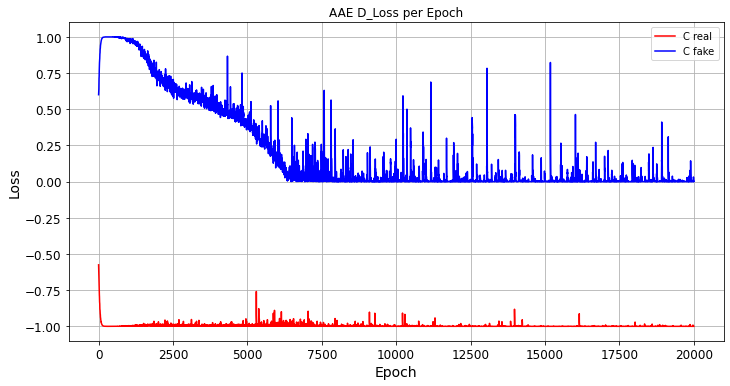

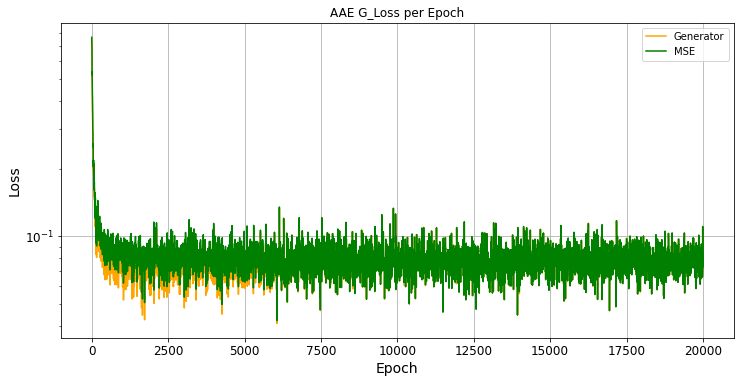

In [10]:
print('D_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.c1_hist, c='red')
ax.plot(aae.c2_hist, c='blue')

ax.legend(['C real', 'C fake'])
ax.grid()

plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE D_Loss per Epoch")
plt.savefig('AAE/Losses/D_loss'+str(epochs)+'.png')

print('G_Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
ax.plot(aae.g1_hist, c='orange')
ax.plot(aae.g2_hist, c='green')

ax.legend(['Generator', 'MSE'])
ax.grid()

plt.tight_layout()
plt.yscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("AAE G_Loss per Epoch")
plt.savefig('AAE/Losses/G_loss'+str(epochs)+'.png')


### predict from the decoder

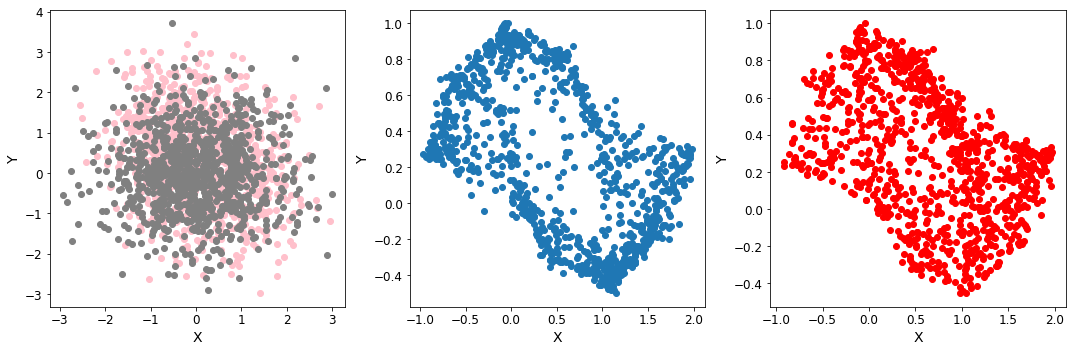

In [11]:
#predict the labels of the data values on the basis of the trained model.
#sampling from the latent space without prediction
#X, _ = make_swiss_roll(n_samples=int(self.batch_size*self.Z/3), noise=0.3)
#latent_values5 = X.reshape([1000,Z])
latent_values = tf.random.normal([1000, Z])
predicted_values = aae.decoder(latent_values)

predicted_values2 = aae.decoder(aae.encoder(X_train_scaled))
predicted_values3 = aae.encoder(X_train_scaled)
#predicted_values4 = scaler.inverse_transform(X_train_scaled)

if scaled == '-1-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    predicted_values2 = scaler.inverse_transform(predicted_values2)
    


if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",Z)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    ab.scatter(predicted_values5[:,0],predicted_values5[:,1],predicted_values5[:,2])
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,predicted_values[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,predicted_values[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    plt.savefig('AAE/Random_test'+'.png')
    
    
else:
    #ab = plt.subplot(projection='3d')
    #ab.scatter(latent_values5[:,0],latent_values5[:,1],latent_values5[:,2])
    #ab.set_ylabel('Y')
    #ab.set_zlabel('Z')
    #ab.set_xlabel('X')
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)

    axes[0].scatter(predicted_values3[:,0],predicted_values3[:,1],c='pink')#encoder(X_train_scaled)
    axes[0].scatter(latent_values[:,0],latent_values[:,1],c='grey')
    axes[0].set_ylabel('Y')
    axes[0].set_xlabel('X')

    
    
    axes[1].scatter(predicted_values2[:,0],predicted_values2[:,1],)#encoder/decoder
    #axes[1].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[1].set_ylabel('Y')
    axes[1].set_xlabel('X')

    
    axes[2].scatter(predicted_values[:,0],predicted_values[:,1],c='red') #decoder(latent space)
    #axes[2].scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    axes[2].set_ylabel('Y')
    axes[2].set_xlabel('X')
    
    plt.tight_layout()
    plt.savefig('AAE/Result/'+str(epochs)+'.png')




### Applying the prediction function

input_test : (700, 2)


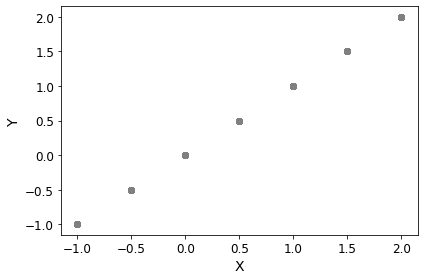

In [12]:
# define these for desired prediction
x_input =[-1.0,-0.5,0,0.5,1.0,1.5,2.0]
n_points = 700
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//7, n_features), x_input[0])
predict2 = np.full((n_points//7, n_features), x_input[1])
predict3 = np.full((n_points//7, n_features), x_input[2])
predict4 = np.full((n_points//7, n_features), x_input[3])
predict5 = np.full((n_points//7, n_features), x_input[4])
predict6 = np.full((n_points//7, n_features), x_input[5])
predict7 = np.full((n_points//7, n_features), x_input[6])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7))
#predictthis_scaled = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [13]:
X_generated = aae.predict(input_test, scaler)
print("X_generated :",X_generated.shape)

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (700, 2)
input: (

Generated Data: (699, 2)


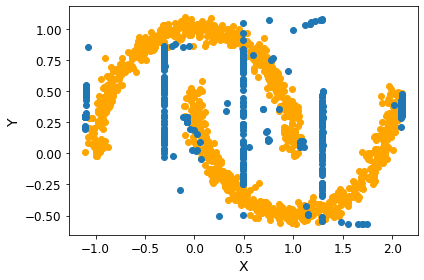

In [14]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')


    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,c='orange') 
    plt.scatter(X_generated[:,0],X_generated[:,1])
    #plt.scatter(predicted_values4[:,0],predicted_values4[:,1],c='grey')#X_trained_scaled
    #plt.scatter(predicted_values2[:,0],predicted_values2[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('AAE/Prediction/'+str(epochs)+'.png')
    